##### <h1>Deep Learning Workshop</h1>
<br>
<a href="http://home.cse.shirazu.ac.ir/~m.valipour/">Mojtaba Valipour</a> @ Shiraz University

<h5>Session 2 + Code Session </h5>
<div style="width: 400px;float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/keras.png)
</div>
<p><strong><span class="a"></span></strong> <span class="b"></span> <span></span></p>

<img src="elements/images/phd-2.jpg" alt="Drawing" align="middle" style="width: 700px;"/>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [17]:
# Helper Functions, don't bother yourself to learn them now
from scipy.ndimage.measurements import label
from skimage.measure import regionprops #, label

In [18]:
def drawLabeledBBoxes(img, labels, scale):
    for carNumber in range(1, labels[1]+1):
        nonzero = (labels[0] == carNumber).nonzero()
        
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        
        p0l,p0r = bbox[0]
        p1l,p1r = bbox[1]
        p0l = np.int(p0l * scale)
        p0r = np.int(p0r * scale)
        p1l = np.int(p1l * scale)
        p1r = np.int(p1r * scale)
        
        if p1r > (img.shape[0]/2 + 25): # ignore half of the image , I know it's SKY
            cv2.rectangle(img, (p0l, p0r), (p1l, p1r), (0,0,255), 5)
    return img

In [19]:
def processImg(img):
    heatmap = model.predict(img.reshape(1,img.shape[0],img.shape[1],img.shape[2]))
    res1 = heatmap[0,:,:,0]
    
    res2 = res1>0.99
    xx, yy = np.meshgrid(np.arange(heatmap.shape[2]),np.arange(heatmap.shape[1]))
    x = (xx[res1>0.99])
    y = (yy[res1>0.99])
    res3 = np.copy(img)
    for i,j in zip(x,y):
        cv2.rectangle(res3, (i*8,j*8), (i*8+64,j*8+64), (0,0,255), 5)

    res4Heatmap = cv2.resize(res2*255., (img.shape[1], img.shape[0]))
    labels = label(res4Heatmap)
    res4 = drawLabeledBBoxes(np.copy(img), labels, scale)
    
    return res1, res2, res3, res4 

In [20]:
# find factors automatically
def factorsFind(num, prefer=None):
    if prefer is not None:
        bestDivider = prefer
        return bestDivider, int(num/bestDivider)
    bestDivider = 1
    for i in range(2,int(num/2)):
        if num%i == 0:
            bestDivider = i
    return bestDivider, int(num/bestDivider)

In [21]:
def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], figsize=(12,3), grayFlag=False, thr=0.0):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=figsize)
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        imgID = np.random.randint(nLimit-1)
        image = data[imgID]    
        image = image * 255.
        
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image+thr)
        img.set_title(labels[imgID],fontsize=7)
        plt.axis('off')

### Load dataset using pickle format in python

In [22]:
import pickle
X = pickle.load( open( "xkerasData.p", "rb" ) )
y = pickle.load( open( "ykerasData.p", "rb" ) )

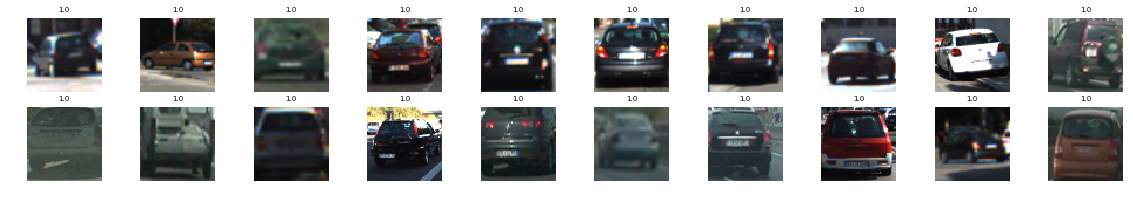

In [23]:
import numpy as np
numSample = 20
factors = factorsFind(numSample, 10)[::-1]
plotSpecialTool(X[y==1],np.ones(len(X[y==1])),samples2Visualize=numSample,factors=factors, figsize=(20,3),thr=0.0,grayFlag=False) 

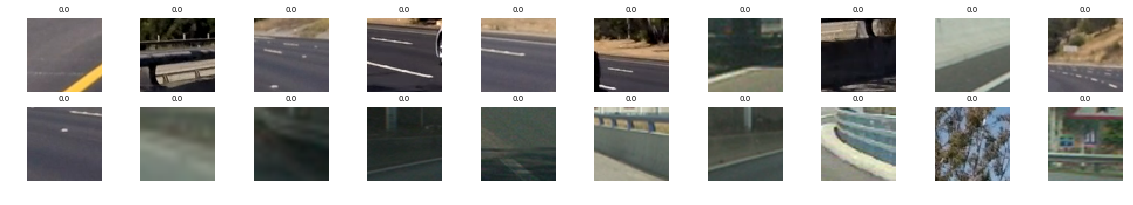

In [24]:
plotSpecialTool(X[y==-1],np.zeros(len(X[y==-1])),samples2Visualize=numSample,factors=factors, figsize=(20,3),thr=0.0,grayFlag=False) 

### We need to validate our model after training

In [25]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.10)

<img src="elements/images/KerasModels.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [26]:
# Load libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [27]:
input_shape = xTrain[0].shape
model = Sequential()

<img src="elements/images/kerasModels2.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [28]:
model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=input_shape, output_shape=input_shape))

<img src="elements/images/kerasModels3.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [29]:
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv1',input_shape=input_shape, border_mode="same"))

<img src="elements/images/KerasModels4.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [30]:
model.add(MaxPooling2D(pool_size=(8,8)))

In [31]:
model.add(Dropout(0.25))

<img src="elements/images/KerasModels5.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [32]:
model.add(Convolution2D(128,8,8,activation="relu",name="dense1")) 

<img src="elements/images/KerasModels6.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [33]:
model.add(Dropout(0.5))

<img src="elements/images/KerasModels7.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [34]:
model.add(Convolution2D(1,1,1,name="dense2", activation="tanh"))

<img src="elements/images/KerasModels8.png" alt="Keras Model" align="middle" style="width: 700px;"/>

In [35]:
model.add(Flatten()) 

In [36]:
model.compile(loss='mse',optimizer='adadelta',metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 64, 64, 3)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 64, 10)    280         lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 8, 8, 10)      0           conv1[0][0]                      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 8, 8, 10)      0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [37]:
model.fit(xTrain, yTrain, batch_size=128, nb_epoch=5, verbose=1, validation_data=(xTest, yTest))
score = model.evaluate(xTest, yTest, verbose=0)
print(score)
model.save_weights("model.h5")

Train on 15984 samples, validate on 1776 samples
Epoch 1/5
15984/15984 [==============================] - 36s - loss: 0.5069 - acc: 0.5104 - val_loss: 0.2396 - val_acc: 0.7630

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Convolution2D, MaxPooling2D

input_shape = [None, None, 3]
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1.,input_shape=input_shape, output_shape=input_shape))

# please replace the questions mark before run !
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv1',input_shape=input_shape, border_mode="same"))
model.add(MaxPooling2D(pool_size=(8,8)))
model.add(Dropout(0.25))
model.add(Convolution2D(128,8,8,activation="relu",name="dense1")) 
model.add(Dropout(0.5))
model.add(Convolution2D(1,1,1,name="dense2", activation="tanh"))
model.load_weights("model.h5")

6 (6, 5)


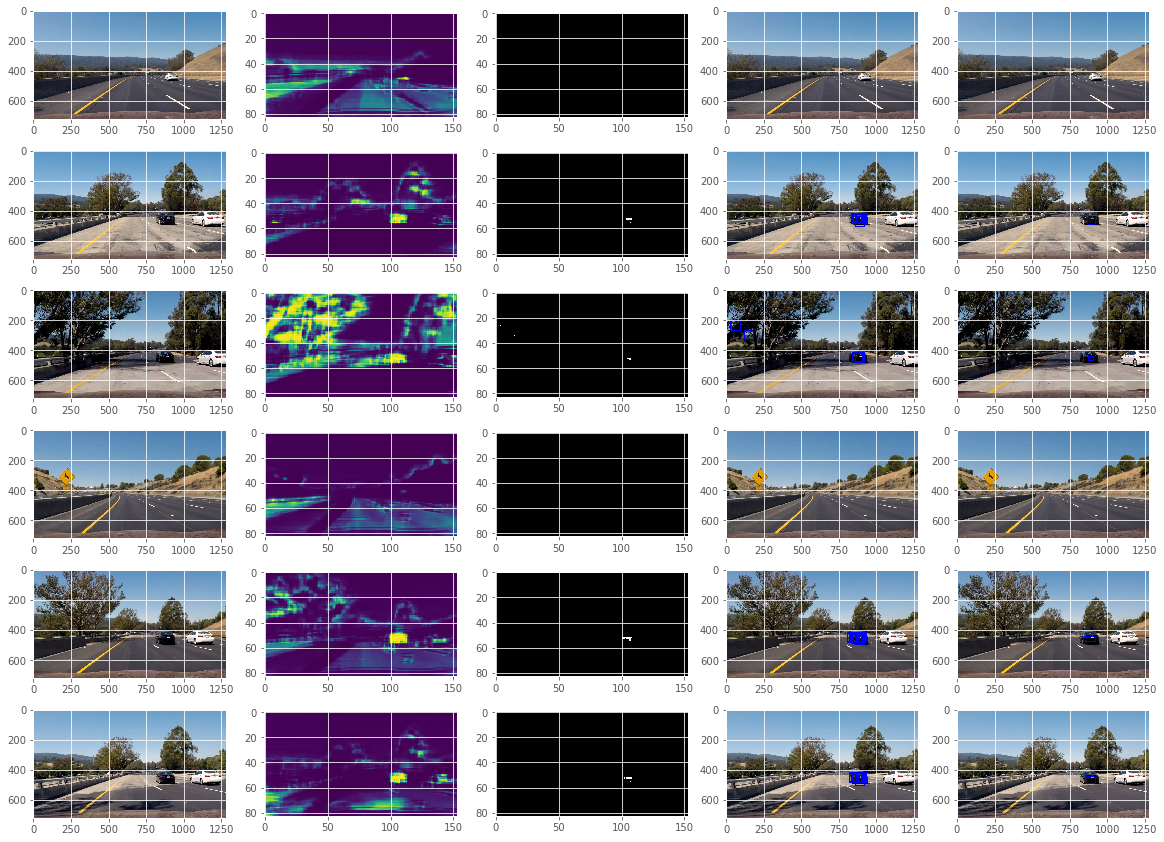

In [39]:
# Beautiful Output after training

%matplotlib inline
import matplotlib.pylab as plt
import cv2

# Final Pipeline
import glob
import numpy as np
import matplotlib.pyplot as plt

directory = './test_images/*.jpg'
globDir = glob.glob(directory)
factors = factorsFind(len(globDir)*5,5)[::-1]
print(len(globDir),factors)
fig = plt.figure(figsize=(20, 15))
counter = 1
scale = 1

for filename in globDir:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, eval('cv2.COLOR_BGR2{}'.format('RGB')))  
    
    imgProcess = img.astype(np.float32)#/255
    
    if scale != 1:
        imgProcess = cv2.resize(imgProcess, (np.int(img.shape[1]/scale), np.int(img.shape[0]/scale) ) )
    
    res1, res2, res3, res4 = processImg(imgProcess)
    
    fig.add_subplot(factors[0],factors[1],counter)
    counter += 1
    plt.imshow(img) # plot original image  
      
    fig.add_subplot(factors[0],factors[1],counter)
    counter += 1
    outputResult = res1 #cv2.resize(res1, (img.shape[1], img.shape[0]))
    plt.imshow(outputResult) 
    
    fig.add_subplot(factors[0],factors[1],counter)
    counter += 1
    outputResult = res2 #cv2.resize(res2, (img.shape[1], img.shape[0]))
    plt.imshow(outputResult, cmap="gray") 
    
    fig.add_subplot(factors[0],factors[1],counter)
    counter += 1
    outputResult = res3*255. #cv2.resize(res3, (img.shape[1], img.shape[0]))
    plt.imshow(outputResult) 
    
    fig.add_subplot(factors[0],factors[1],counter)
    counter += 1
    outputResult = res4*255. #cv2.resize(res4, (img.shape[1], img.shape[0]))
    plt.imshow(outputResult) 